In [1]:
%load_ext autoreload
%autoreload 2

import json
import numpy as np
from pbo.utils.confidence_interval import confidence_interval

experiment_name = "test"
show_dqn = True; show_pbo_linear = False; show_pbo_deep = True; show_idqn = True
max_bellman_iterations = 9
max_bellman_iterations_validation = max_bellman_iterations + 10
seeds = range(1, 2)

p = json.load(open(f"figures/{experiment_name}/parameters.json"))

n_seeds = len(seeds)
ticks_freq = 1
dt = 0.01

### Extract data

In [2]:
if show_dqn:
    dqn_metrics = np.zeros((n_seeds, max_bellman_iterations + 1, 2))

    for idx_seed, seed in enumerate(seeds):
        dqn_metrics[idx_seed] = np.load(f"figures/{experiment_name}/DQN/{max_bellman_iterations}_M_{seed}.npy")

if show_pbo_linear:
    pbo_linear_metrics = np.zeros((n_seeds, max_bellman_iterations_validation + 2, 2))

    for idx_seed, seed in enumerate(seeds):
        pbo_linear_metrics[idx_seed] = np.load(f"figures/{experiment_name}/PBO_linear/{max_bellman_iterations}_M_{seed}.npy")

if show_pbo_deep:
    pbo_deep_metrics = np.zeros((n_seeds, max_bellman_iterations_validation + 1, 2))

    for idx_seed, seed in enumerate(seeds):
        pbo_deep_metrics[idx_seed] = np.load(f"figures/{experiment_name}/PBO_deep/{max_bellman_iterations}_M_{seed}.npy")

if show_idqn:
    idqn_metrics = np.zeros((n_seeds, max_bellman_iterations + 1, 2))

    for idx_seed, seed in enumerate(seeds):
        idqn_metrics[idx_seed] = np.load(f"figures/{experiment_name}/IDQN/{max_bellman_iterations}_M_{seed}.npy")


### Number of seconds archieved

In [3]:
if show_dqn:
    dqn_seconds_mean = (dqn_metrics[:, :, 0] * dt).mean(axis=0)
    dqn_seconds_std = (dqn_metrics[:, :, 0] * dt).std(axis=0)
    dqn_seconds_confidence_interval = confidence_interval(dqn_seconds_mean, dqn_seconds_std, n_seeds)

if show_pbo_linear:
    pbo_linear_seconds_mean = (pbo_linear_metrics[:, :, 0] * dt).mean(axis=0)
    pbo_linear_seconds_std = (pbo_linear_metrics[:, :, 0] * dt).std(axis=0)
    pbo_linear_seconds_confidence_interval = confidence_interval(pbo_linear_seconds_mean, pbo_linear_seconds_std, n_seeds)

if show_pbo_deep:
    pbo_deep_seconds_mean = (pbo_deep_metrics[:, :, 0] * dt).mean(axis=0)
    pbo_deep_seconds_std = (pbo_deep_metrics[:, :, 0] * dt).std(axis=0)
    pbo_deep_seconds_confidence_interval = confidence_interval(pbo_deep_seconds_mean, pbo_deep_seconds_std, n_seeds)

if show_idqn:
    idqn_seconds_mean = (idqn_metrics[:, :, 0] * dt).mean(axis=0)
    idqn_seconds_std = (idqn_metrics[:, :, 0] * dt).std(axis=0)
    idqn_seconds_confidence_interval = confidence_interval(idqn_seconds_mean, idqn_seconds_std, n_seeds)

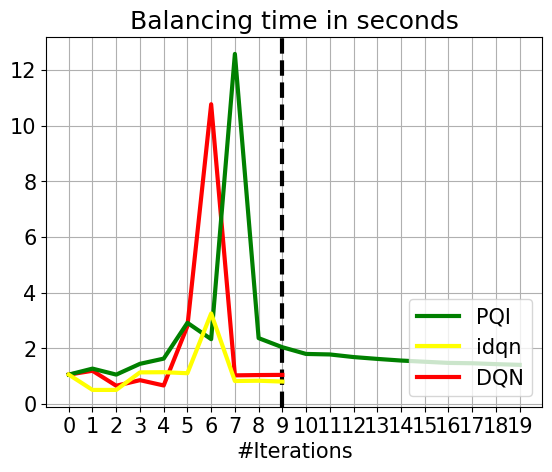

In [4]:
import matplotlib.pyplot as plt 

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

if show_pbo_linear:
    plt.plot(iterations_validation, pbo_linear_seconds_mean[:-1], label="linear PBO", color="blue", zorder=7)
    plt.fill_between(iterations_validation, pbo_linear_seconds_confidence_interval[0, :-1], pbo_linear_seconds_confidence_interval[1, :-1], color="blue", alpha=0.3)

    # plt.hlines(pbo_linear_q_mean[-1], 0, max_bellman_iterations_validation, color="blue", linestyle="--", label="linear PBO fixed point", zorder=3)
    # plt.fill_between(iterations_validation, pbo_linear_q_confidence_interval[0, -1], pbo_linear_q_confidence_interval[1, -1], color="blue", alpha=0.3)

if show_pbo_deep:
    plt.plot(iterations_validation, pbo_deep_seconds_mean, label="PQI", color="green", zorder=8)
    plt.fill_between(iterations_validation, pbo_deep_seconds_confidence_interval[0], pbo_deep_seconds_confidence_interval[1], color="green", alpha=0.3)

if show_idqn:
    plt.plot(iterations, idqn_seconds_mean, label="idqn", color="yellow", zorder=9)
    plt.fill_between(iterations, idqn_seconds_confidence_interval[0], idqn_seconds_confidence_interval[1], color="yellow", alpha=0.3)

if show_dqn:
    plt.plot(iterations, dqn_seconds_mean, label="DQN", color="red", zorder=6)
    plt.fill_between(iterations, dqn_seconds_confidence_interval[0], dqn_seconds_confidence_interval[1], color="red", alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--", zorder=2)
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")
plt.title("Balancing time in seconds")
plt.legend(loc='lower right').set_zorder(9)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/{experiment_name}/seconds_{max_bellman_iterations}.pdf", bbox_inches='tight')

### Performance

In [5]:
if show_dqn:
    dqn_performances_mean = (dqn_metrics[:, :, 1]).mean(axis=0)
    dqn_performances_std = (dqn_metrics[:, :, 1]).std(axis=0)
    dqn_performances_confidence_interval = confidence_interval(dqn_performances_mean, dqn_performances_std, n_seeds)

if show_pbo_linear:
    pbo_linear_performances_mean = (pbo_linear_metrics[:, :, 1]).mean(axis=0)
    pbo_linear_performances_std = (pbo_linear_metrics[:, :, 1]).std(axis=0)
    pbo_linear_performances_confidence_interval = confidence_interval(pbo_linear_performances_mean, pbo_linear_performances_std, n_seeds)

if show_pbo_deep:
    pbo_deep_performances_mean = (pbo_deep_metrics[:, :, 1]).mean(axis=0)
    pbo_deep_performances_std = (pbo_deep_metrics[:, :, 1]).std(axis=0)
    pbo_deep_performances_confidence_interval = confidence_interval(pbo_deep_performances_mean, pbo_deep_performances_std, n_seeds)

if show_idqn:
    idqn_performances_mean = (idqn_metrics[:, :, 1]).mean(axis=0)
    idqn_performances_std = (idqn_metrics[:, :, 1]).std(axis=0)
    idqn_performances_confidence_interval = confidence_interval(idqn_performances_mean, idqn_performances_std, n_seeds)

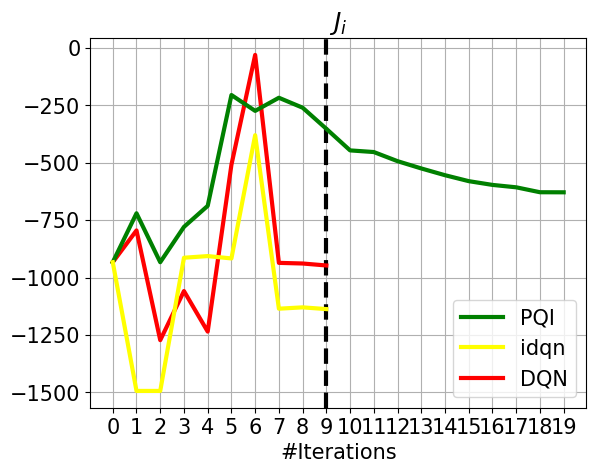

In [6]:
import matplotlib.pyplot as plt 

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

if show_pbo_linear:
    plt.plot(iterations_validation, pbo_linear_performances_mean[:-1], label="linear PBO", color="blue", zorder=7)
    plt.fill_between(iterations_validation, pbo_linear_performances_confidence_interval[0, :-1], pbo_linear_performances_confidence_interval[1, :-1], color="blue", alpha=0.3)

    # plt.hlines(pbo_linear_q_mean[-1], 0, max_bellman_iterations_validation, color="blue", linestyle="--", label="linear PBO fixed point", zorder=3)
    # plt.fill_between(iterations_validation, pbo_linear_q_confidence_interval[0, -1], pbo_linear_q_confidence_interval[1, -1], color="blue", alpha=0.3)

if show_pbo_deep:
    plt.plot(iterations_validation, pbo_deep_performances_mean, label="PQI", color="green", zorder=8)
    plt.fill_between(iterations_validation, pbo_deep_performances_confidence_interval[0], pbo_deep_performances_confidence_interval[1], color="green", alpha=0.3)

if show_idqn:
    plt.plot(iterations, idqn_performances_mean, label="idqn", color="yellow", zorder=9)
    plt.fill_between(iterations, idqn_performances_confidence_interval[0], idqn_performances_confidence_interval[1], color="yellow", alpha=0.3)

if show_dqn:
    plt.plot(iterations, dqn_performances_mean, label="DQN", color="red", zorder=6)
    plt.fill_between(iterations, dqn_performances_confidence_interval[0], dqn_performances_confidence_interval[1], color="red", alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--", zorder=2)
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")
plt.title(r"$J_i$")
plt.legend(loc='lower right').set_zorder(9)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/{experiment_name}/performance_{max_bellman_iterations}.pdf", bbox_inches='tight')